## Face recognition machine learning

|Image showing facial detection of unknown face|Facial recognition of target faces|
|:-:|:-:|
|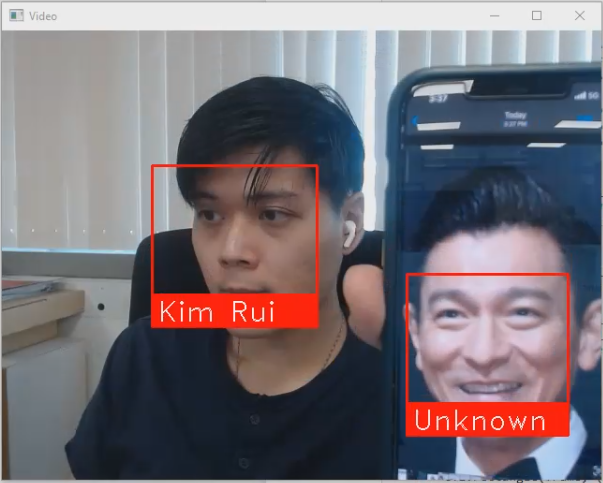|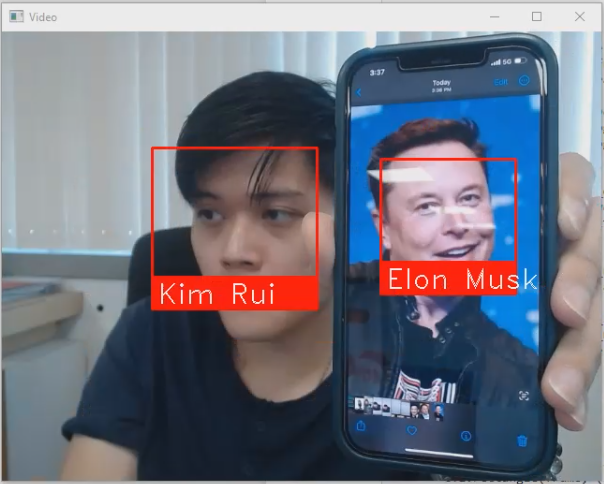|

### Video: Facial detection using webcam
[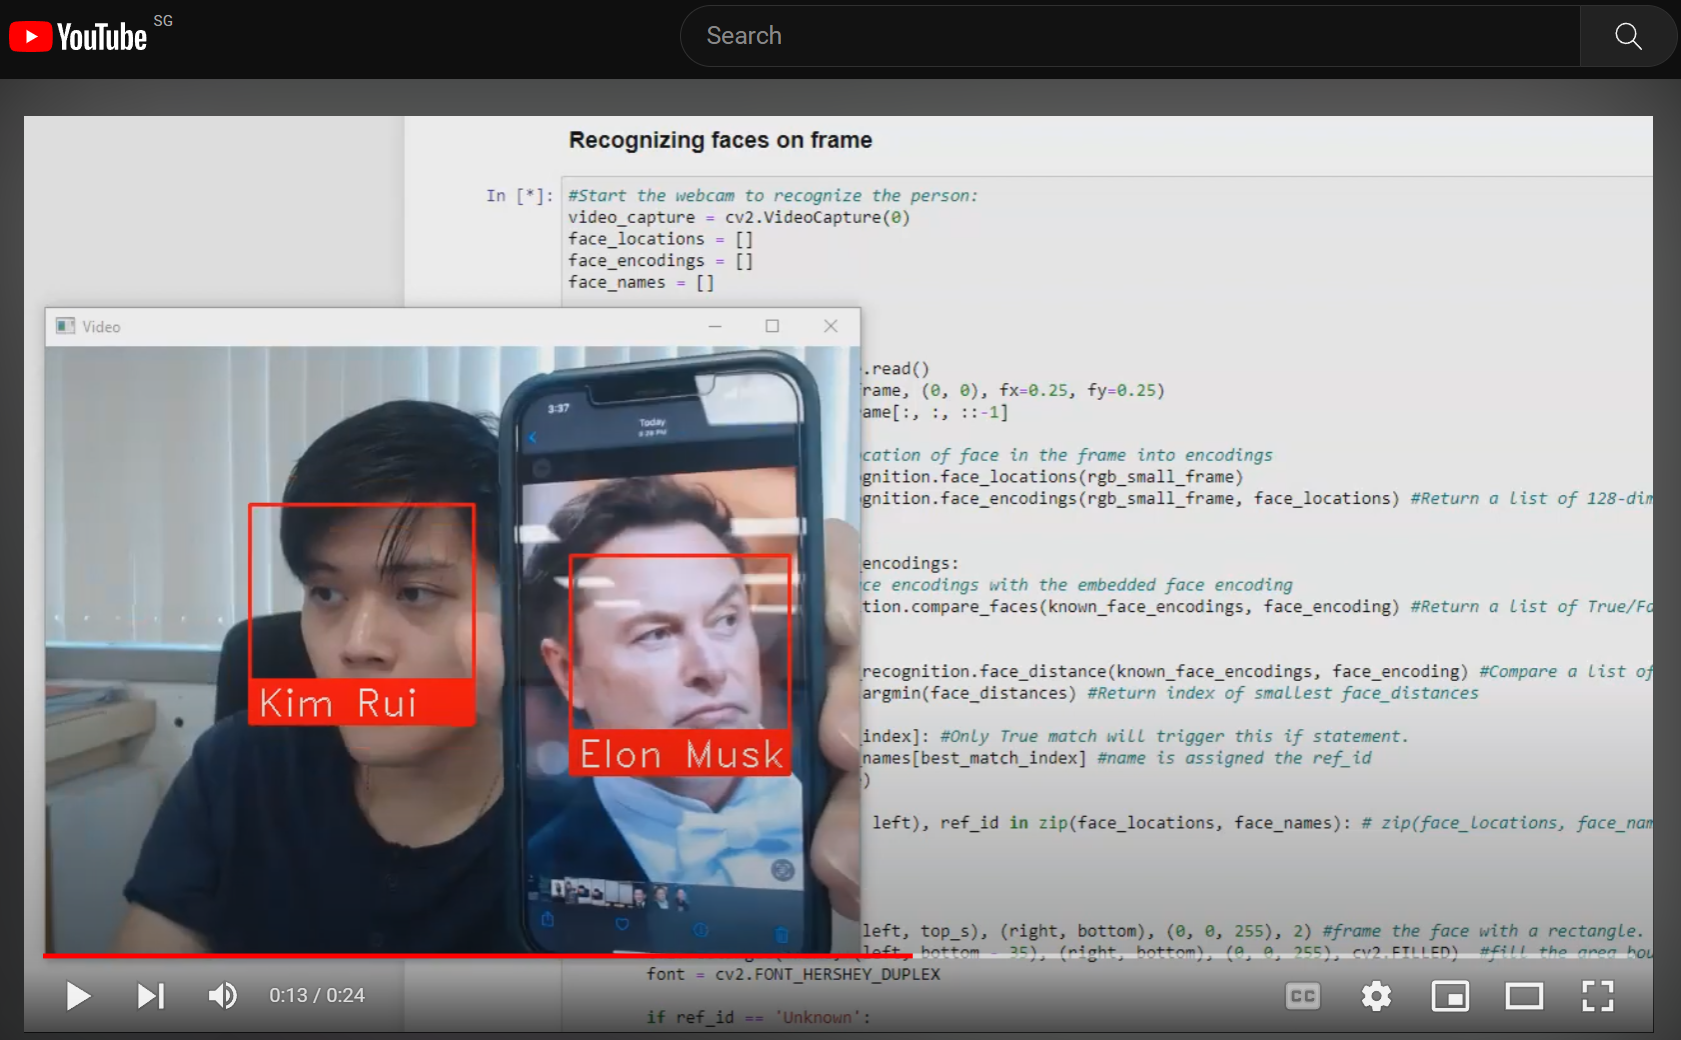](https://youtu.be/QDqpbK0LgeQ)

### Import the require facial_recognition libraries

In [25]:
import sys
import os
import cv2
import dlib
import face_recognition
import pickle
import numpy as np
import glob
#from goto import goto

### To create dictionaries of id, names and face encodings of embedded faces

In [15]:
ref_dictt={}
embed_dictt = {}
ref_id = 'Default'

### Create the name and the reference id of the first face to be embedded and recognised

In [16]:
#Create and add new keys and items to dictionary {ref_id: 'name'}
name=input("Enter name: ")
ref_id=input("Enter id: ")
while True:
    if ref_id in ref_dictt.keys(): #see if the key entered has been taken.
        print("id entered has been taken. Please enter a new id.")
        ref_id=input("Enter id: ")
    else:
        ref_dictt[ref_id]=name
        break
        
while True:        
    response=input("Enter another name and id? y/n \n").lower().strip()
    if response == 'y':
        name=input("Enter name: ")
        ref_id=input("Enter id: ")
        while True:
            if ref_id in ref_dictt.keys(): #see if the key entered has been taken.
                print("id entered has been taken. Please enter a new id.")
                ref_id=input("Enter id: ")
            else:
                ref_dictt[ref_id]=name
                break
    elif response == 'n':
        break
    else:
        print("Please enter y or n")
        continue
print(f"Reference dictionary of names and id: {ref_dictt}")

Enter name: Kim Rui
Enter id: 1
Enter another name and id? y/n 
y
Enter name: Elon Musk
Enter id: 2
Enter another name and id? y/n 
n
Reference dictionary of names and id: {'1': 'Kim Rui', '2': 'Elon Musk'}


### Open webcam and take specified number of photos of the target person as input and create its embeddings:

In [30]:
Activation1 = True
Activation2 = True
Button_press = 0
id_list = list(ref_dictt.keys())
i = 0

while Activation1:
    
    webcam = cv2.VideoCapture(0) #Opens a camera for video capturing. 0 for first camera input.
    print("Scanning the face of {}.".format(ref_dictt[id_list[i]]))
    
    while Activation2:
        
        #Check read of cam
        check, frame = webcam.read() #Returns first a boolean (check) indicating whether the read was successful, and then the image(frame) itself (which will be empty if the return value was False). 
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
        rgb_small_frame = small_frame[:, :, ::-1] #small_frame has three dimensions - height, width, colour (255,255,0)
    
        #Detect coordinates of face in frame
        face_locations = face_recognition.face_locations(rgb_small_frame) # Return a list of tuples of found face locations in css (top, right, bottom, left) order.
        
        #Map all coordinates of face location to face tracking rectangle
        for top_s, right, bottom, left in face_locations: # face_locations = a tuple of (top_s, right, bottom, left)
            top_s *= 4
            right *= 4
            bottom *= 4
            left *= 4
            cv2.rectangle(frame, (left, top_s), (right, bottom), (0, 0, 255), 2) #frame the face with a rectangle. cv2.rectangle(image, start_point, end_point, color, thickness) color=(0,0,255)
            cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)  #fill the area bound with red colour

            #To displace the face tracking rectangle and the number of scan completed.
            font = cv2.FONT_HERSHEY_DUPLEX
            text = 'Scan ' + str(Button_press) + f' of {ref_dictt[id_list[i]]}'
            cv2.putText(frame, text, (left + 6, bottom - 6), font, 0.6, (255, 255, 255), 1)
       
        # To display the instructions on window.
        font = cv2.FONT_HERSHEY_DUPLEX
        text = 'Press "s" to scan/ "q" to scan next face/'
        cv2.putText(frame, text, (15, 15), font, 0.6, (0, 0, 255), 1)
        # To display the instructions on window.
        font = cv2.FONT_HERSHEY_DUPLEX
        text = '"c" to close the program.'
        cv2.putText(frame, text, (15, 35), font, 0.6, (0, 0, 255), 1)
        
        cv2.imshow("Embedding Process", frame) #cv2.imshow(window_name, image)
        
        #To capture face and translate face pixel to face encodings for each frame captured on webcam.
        key = cv2.waitKey(1) & 0xFF
        if key == ord('s'): #Press 's' to capture the images of the target person. ord('q') returns the Unicode code point of q which is 8 bits of value betwen 0 and 255.
            Button_press += 1
            
            if face_locations != []: #some faces are detected and so proceed to encode the faces.
                try:
                    face_encoding = face_recognition.face_encodings(frame)[0] #Given an image, return the 128-dimension face encoding for each face in the image.
                except:
                    break
                
                if ref_id in embed_dictt: #check if ref_id of target face is store on embedded dictionary
                    embed_dictt[id_list[i]] += [face_encoding]
                else:
                    embed_dictt[id_list[i]] = [face_encoding]
                #webcam.release()
                #cv2.waitKey(1)
                #cv2.destroyAllWindows() #release the camera and shut the display window after every image taken.
                break
            
        #Scan the next face if 'q' button is pressed.
        elif key == ord('q'):
            Button_press = 0
            i += 1
            if i >= len(id_list): #no more faces to scan
                print("Turning off camera.")
                webcam.release()
                print("Camera off.")
                print("Program ended.")
                cv2.destroyAllWindows()
                Activation2 = False
                Activation1 = False
                break
            print("Scanning the face of {}.".format(ref_dictt[id_list[i]]))
                  
        #To turn off the camera if 'c' button was pressed.
        elif key == ord('c'): 
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            Activation2 = False
            Activation1 = False
            break
    
print("Embedding process completed.")

Scanning the face of Kim Rui.
Turning off camera.
Camera off.
Program ended.
Embedding process completed.


### Transfer dictionaries of names and face encoding to respective lists of names and face encodings

In [18]:
#Create two lists, one to store ref_id and other for respective embedding:
known_face_encodings = []
known_face_names = []
for id_ , list_ in embed_dictt.items():
    for item_ in list_: #for list_, there will be num_of_takes of items for each face with ref_id/id_
        known_face_encodings +=[item_] 
        known_face_names += [id_]

### Recognizing faces on frame captured on webcam

In [19]:
#Start the webcam to recognize the person:
video_capture = cv2.VideoCapture(0)
face_locations = []
face_encodings = []
face_names = []

while True:

    ret, frame = video_capture.read()
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    rgb_small_frame = small_frame[:, :, ::-1]
    
    #translate the face and location of face in the frame into encodings 
    face_locations = face_recognition.face_locations(rgb_small_frame)
    face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations) #Return a list of 128-dimensional face encodings (one for each face in the image). Face locations which are the bounding boxes of each face are optional.
    face_names = []
        
    for face_encoding in face_encodings:
        #Comparing incoming face encodings with the embedded face encoding
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding) #Return a list of True/False values indicating which known_face_encodings match the face encoding to check
        name = 'Unknown'
            
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding) #Compare a list of face encodings stored in embed_dictt against a candidate encoding from new camera capture to see if they match. Returns: A numpy ndarray with the distance for each face in the same order as the ‘faces’ array
        best_match_index = np.argmin(face_distances) #Return index of smallest face_distances
            
        if matches[best_match_index]: #Only True match will trigger this if statement.
            name = known_face_names[best_match_index] #name is assigned the ref_id
        face_names.append(name)
    
    for (top_s, right, bottom, left), ref_id in zip(face_locations, face_names): # zip(face_locations, face_names) = a tuple of ( (top_s, right, bottom, left), name )
        top_s *= 4
        right *= 4
        bottom *= 4
        left *= 4
        cv2.rectangle(frame, (left, top_s), (right, bottom), (0, 0, 255), 2) #frame the face with a rectangle. cv2.rectangle(image, start_point, end_point, color, thickness) color=(0,0,255)
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)  #fill the area bound with red colour
        font = cv2.FONT_HERSHEY_DUPLEX
        
        if ref_id == 'Unknown':
            cv2.putText(frame, 'Unknown', (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1) #cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
        else:
            cv2.putText(frame, ref_dictt[ref_id], (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1) #fill the area bound with red colour
    
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, 'Press "c" to close the program.', (15, 15), font, 0.6, (0, 0, 255), 1)
    cv2.imshow('Recognizing', frame) #cv2.imshow(window_name, image)
    
    if cv2.waitKey(1) & 0xFF == ord('c'):
        break
        
video_capture.release()
cv2.destroyAllWindows()

### Explanation for some codes

###  
cv2.waitKey(1) & 0xFF:

Wait 1 ms for key press and it will continue to refresh and read frame from your webcam using .read(). If user press, 'q' then waitKey return DECIMAL VALUE of 'q' is 113. In Binary, It is expressed as 0b01110001. 

Next, AND operator is excuted with two inputs are 0b01110001 and 0xFF (0b11111111). 0b01110001 AND 0b11111111 = 0b01110001. The exact result is binary number of q.
                 
Second, compare value of left expression 0b01110001 with ord('q'). 
Clearly, these values is the same as another value. And final result is break is invoked. 

### Useful site
https://pyimagesearch.com/2018/06/18/face-recognition-with-opencv-python-and-deep-learning/
https://face-recognition.readthedocs.io/en/latest/face_recognition.html